Abhay Dagar(2022014)        
Rohan  Kumar Bhasugade(2022416)

### **Facial Expression Detection From an Image**

In [2]:
import numpy as np
import cv2
import glob
import pandas as pd

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


### **Loading Data in variables properly for furthur usage**

In [4]:
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Initialize a dictionary to store data frames for each emotion
emotion_frames = {}

# Loop through each emotion category
for emotion in emotions:
    #getting file path of current image
    image_paths = glob.glob(f"train\{emotion}\*")
    # Create a data frame for the current emotion
    emotion_frames[emotion] = pd.DataFrame({
        "path": image_paths,
        "image": [path.split("\\")[-1] for path in image_paths],  # Extract image name from path
        "label": emotions.index(emotion) + 1  # Assign label based on index of emotion
    })
    # Print the total number of images for the current emotion
    print(f"Total {emotion} images: {emotion_frames[emotion].shape[0]}")

Total angry images: 8607
Total disgust images: 799
Total fear images: 8796
Total happy images: 12243
Total neutral images: 4575
Total sad images: 9304
Total surprise images: 5938


In [5]:
# Load images and labels from data frames
X_train= []
y_train= []
for emotion, df in emotion_frames.items():
    for path in df['path']:
        image = cv2.imread(path, 0)  # Read image in grayscale
        X_train.append(image.flatten())  # Flatten image and add to feature matrix
        y_train.append(df.loc[df['path'] == path, 'label'].values[0])  # Add label to target array

X_train= np.array(X_train)
y_train= np.array(y_train)


### **Printing the graph of data used of each type of expression**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\abhaydagar\AppData\Local\Temp\ipykernel_2448\4045621426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=train_set, palette="viridis")  # Use viridis color palette


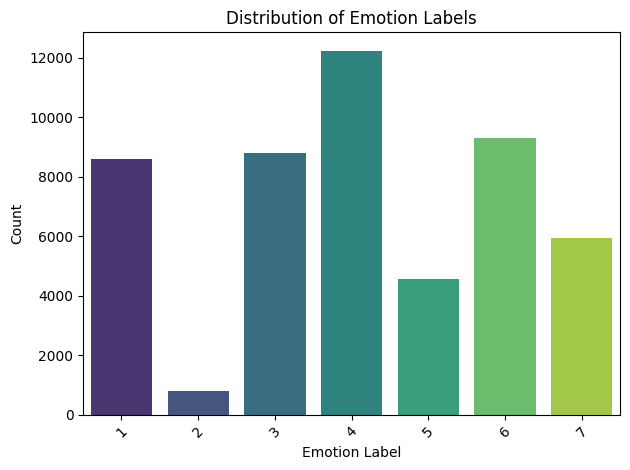

Total images: 50262


In [7]:
train_set = pd.concat(emotion_frames.values())

sns.countplot(x="label", data=train_set, palette="viridis")  # Use viridis color palette
plt.title("Distribution of Emotion Labels")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Print total number of images
total_images = train_set.shape[0]
print("Total images:", total_images)


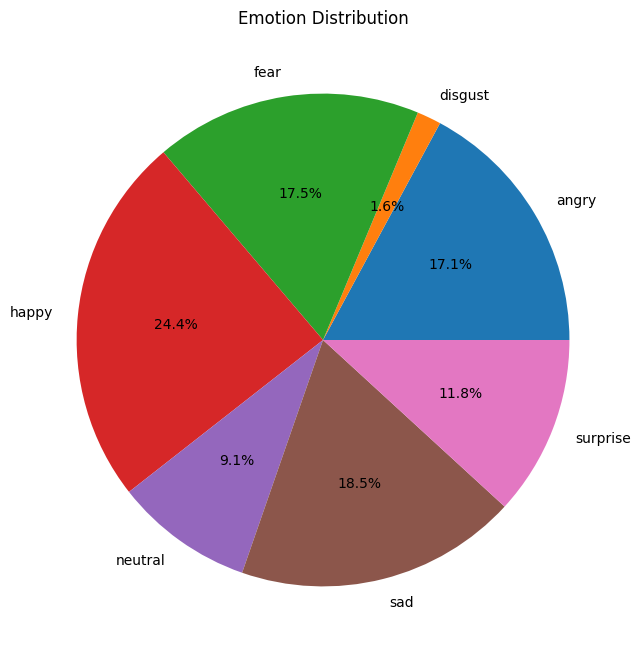

In [8]:
plt.figure(figsize=(8, 8))
plt.pie([frame.shape[0] for frame in emotion_frames.values()], labels=emotions, autopct='%1.1f%%')
plt.title('Emotion Distribution')
plt.show()


In [9]:
print(train_set)

                                     path                 image  label
0                       train\angry\0.jpg                 0.jpg      1
1                       train\angry\1.jpg                 1.jpg      1
2                      train\angry\10.jpg                10.jpg      1
3                   train\angry\10002.jpg             10002.jpg      1
4                   train\angry\10016.jpg             10016.jpg      1
...                                   ...                   ...    ...
5933  train\surprise\Training_9890261.jpg  Training_9890261.jpg      7
5934  train\surprise\Training_9909756.jpg  Training_9909756.jpg      7
5935   train\surprise\Training_991508.jpg   Training_991508.jpg      7
5936  train\surprise\Training_9932811.jpg  Training_9932811.jpg      7
5937  train\surprise\Training_9943398.jpg  Training_9943398.jpg      7

[50262 rows x 3 columns]


### **PCA values of images class wise**

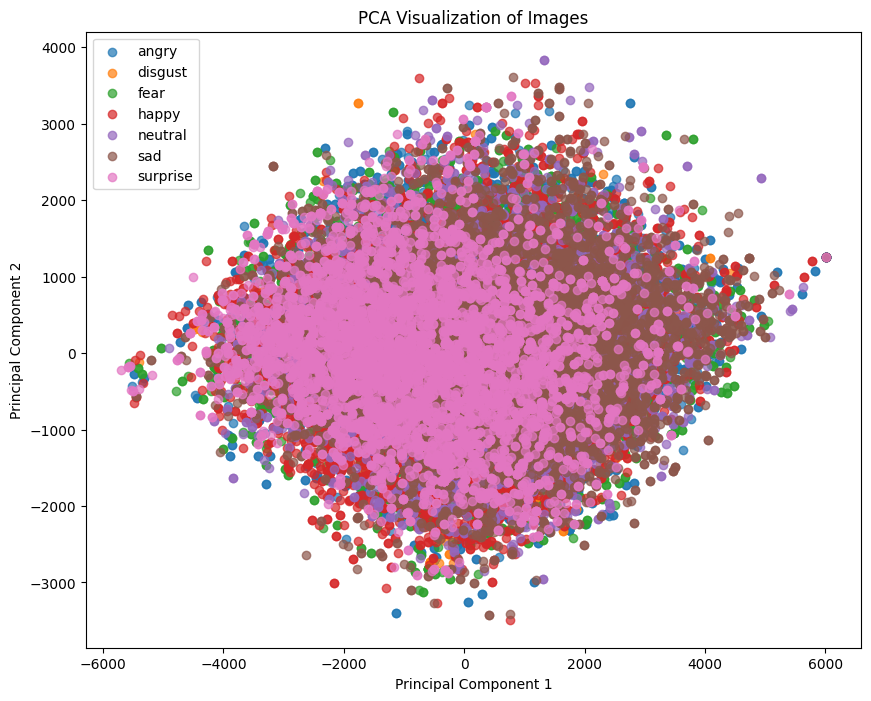

In [10]:
from sklearn.decomposition import PCA

# Flatten images for PCA
images_flat = np.array([cv2.imread(image, cv2.IMREAD_GRAYSCALE).flatten() for image in train_set['path']])

# Perform PCA
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_flat)

# Plot PCA visualization
plt.figure(figsize=(10, 8))
for i, emotion in enumerate(emotions):
    plt.scatter(images_pca[train_set['label'] == i+1, 0], images_pca[train_set['label'] == i+1, 1], label=emotion, alpha=0.7)
plt.title("PCA Visualization of Images")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


### **Pixel Intensity Value**

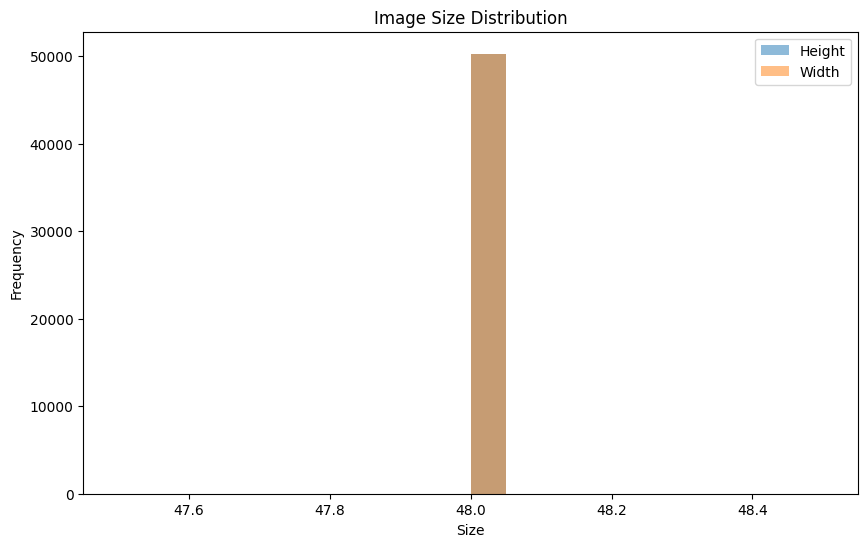

In [11]:
# Calculate image sizes
train_set['height'] = train_set['path'].apply(lambda x: cv2.imread(x).shape[0])
train_set['width'] = train_set['path'].apply(lambda x: cv2.imread(x).shape[1])

# Plot histograms of image sizes
plt.figure(figsize=(10, 6))
plt.hist(train_set['height'], bins=20, alpha=0.5, label='Height')
plt.hist(train_set['width'], bins=20, alpha=0.5, label='Width')
plt.title("Image Size Distribution")
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### **Printing 5 images of each class**

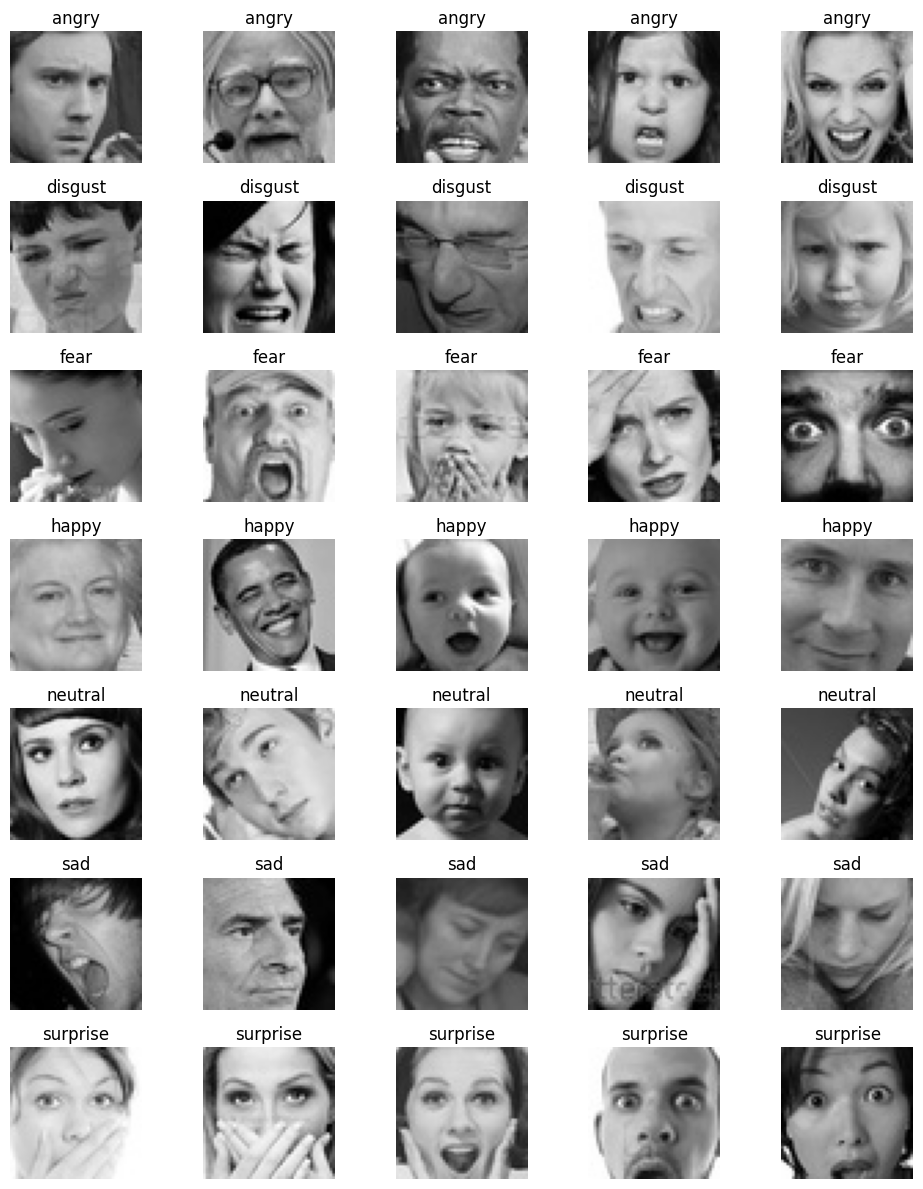

In [12]:
# Plot the images
plt.figure(figsize=(10, 12))
plot_count = 0
for emotion, frame in emotion_frames.items():
    for i in range(min(5, frame.shape[0])):  # Plot up to 5 images for each emotion
        image_path = frame['path'].iloc[i]
        image_name = frame['image'].iloc[i]
        label = emotion
        
        try:
            # Read the image
            image = cv2.imread(image_path)
            
            # Check if image is loaded successfully
            if image is not None:
                plt.subplot(7, 5, plot_count + 1)  # Adjusted subplot index
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper visualization
                plt.title(label)
                plt.axis('off')  # Turn off axis
                plot_count += 1  # Increment plot count
            else:
                print(f"Error: Failed to load image '{image_name}' in path '{image_path}'. Skipping...")
        
        except Exception as e:
            print(f"Error: {e}")

plt.tight_layout()
plt.show()

### **Training Models**

In [13]:

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)


### **MODEL 1: DECISION TREE**

 A simple tree-like structure where internal nodes represent features, branches represent decisions, and leaf nodes represent outcomes.

In [14]:
# Train a decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_pca, y_train)

DecisionTreeClassifier()

### **MODEL 2: RANDOM FOREST**

An ensemble learning method that constructs a multitude of decision trees during training. It randomly selects subsets of data and features, builds multiple decision trees, and merges them together to get more accurate and stable predictions.

In [15]:
# Train a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_pca, y_train)


RandomForestClassifier()

### **MODEL 3: ADABOOST**

An ensemble learning method that combines multiple weak learners into a strong learner. It sequentially trains a series of weak learners (usually decision trees) with more weight on misclassified instances, allowing subsequent weak learners to focus more on difficult cases.

In [16]:
# Train an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(X_train_pca, y_train)


C:\Users\abhaydagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

## **SAVING THE MODELS**

In [46]:
import joblib

# Save Decision Tree model
joblib.dump(decision_tree, 'decision_tree_model.h5')

# Save Random Forest model
joblib.dump(random_forest, 'random_forest_model.h5')

# Save AdaBoost model
joblib.dump(adaboost, 'adaboost_model.h5')


['adaboost_model.h5']

### **Model Leaning Plots**

Plots the learning plot of Decision Tree Training

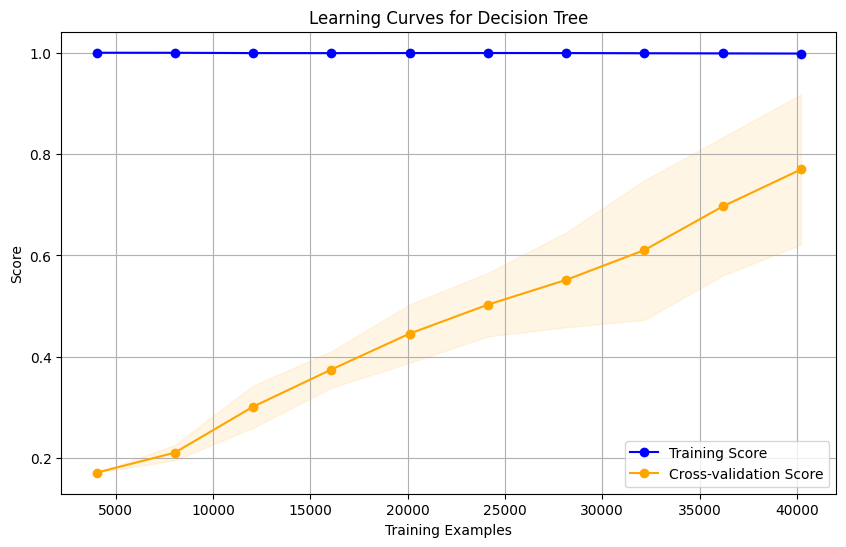

In [18]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y, model_name):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='orange', label='Cross-validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curves for {model_name}')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curves(decision_tree, X_train_pca, y_train, 'Decision Tree')


### **Class_wise accuracy**

In [19]:
def accuracy_class_wise(y_true, y_pred):
    class_accuracy = {}
    unique_classes = np.unique(y_true)
    
    for class_label in unique_classes:
        # Indices of samples belonging to the current class
        indices = np.where(y_true == class_label)[0]
        # Predictions for samples of the current class
        class_predictions = y_pred[indices]
        # True labels for samples of the current class
        class_true_labels = y_true[indices]
        # Accuracy for the current class
        accuracy = np.mean(class_predictions == class_true_labels)
        class_accuracy[class_label] = accuracy
    
    return class_accuracy

### **Testing Phase**

In [51]:
# Loop through each emotion category and collect file paths of images
test_emotion_frames={}
for emotion in emotions:
    image_paths = glob.glob(f"test/{emotion}/*")
    test_emotion_frames[emotion] = pd.DataFrame({
        "path": image_paths,
        "image": [path.split("/")[-1] for path in image_paths],  # Extract image name from path
        "label": emotions.index(emotion) + 1  # Assign label based on index of emotion
    })
    print(f"Total {emotion} images: {test_emotion_frames[emotion].shape[0]}")

Total angry images: 1309
Total disgust images: 295
Total fear images: 1446
Total happy images: 5735
Total neutral images: 2856
Total sad images: 2850
Total surprise images: 2066


In [21]:
# Load images and labels from data frames
X_test= []
y_test= []
for emotion, df in test_emotion_frames.items():
    for path in df['path']:
        image = cv2.imread(path, 0)  # Read image in grayscale
        X_test.append(image.flatten())  # Flatten image and add to feature matrix
        y_test.append(df.loc[df['path'] == path, 'label'].values[0])  # Add label to target array

X_test= np.array(X_test)
y_test= np.array(y_test)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (50262, 2304)
Shape of X_test: (16557, 2304)


In [22]:
# Apply PCA to reduce dimensionality
X_test_pca = pca.transform(X_test)

### **Trained three models before: Decision Tree     , Random Forest      , ADA Boost**

Now Predicting the values and finding the accuracies of each Model Seperately and Class Wise too

In [23]:
# Evaluate models
y_pred_decision_tree = decision_tree.predict(X_test_pca)
y_pred_random_forest = random_forest.predict(X_test_pca)
y_pred_adaboost = adaboost.predict(X_test_pca)

In [24]:
# Calculate accuracy
accuracy_decision_tree_test= accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest_test = accuracy_score(y_test, y_pred_random_forest)
accuracy_adaboost_test= accuracy_score(y_test, y_pred_adaboost)

print("Decision Tree Accuracy:", accuracy_decision_tree_test)
print("Random Forest Accuracy:", accuracy_random_forest_test)
print("AdaBoost Accuracy:", accuracy_adaboost_test)



Decision Tree Accuracy: 0.8434499003442653
Random Forest Accuracy: 0.8363834027903606
AdaBoost Accuracy: 0.3780878178413964


## **ALL MODELS ACCURACIES**

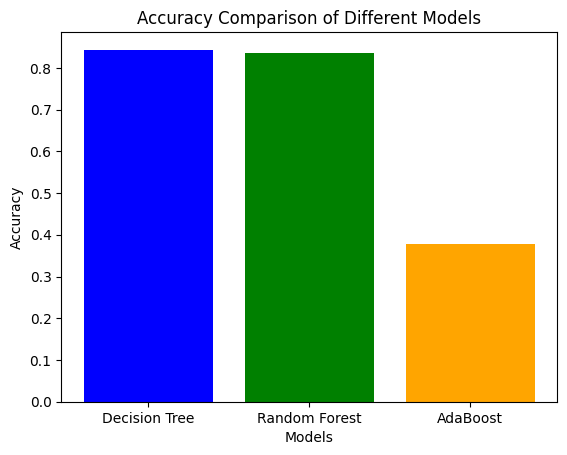

In [25]:
models = ['Decision Tree', 'Random Forest', 'AdaBoost']
accuracies = [accuracy_decision_tree_test, accuracy_random_forest_test, accuracy_adaboost_test]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()


### **Classwise Accuracies**

In [26]:
# Print classification report for each model (includes accuracy class-wise)
print("Classification Report for Decision Tree:")
class_accuracy_decision_tree= accuracy_class_wise(y_test, y_pred_decision_tree)
for class_label, accuracy in class_accuracy_decision_tree.items():
    print(f"Accuracy for class {class_label}: {accuracy}")


print("\nClassification Report for Random Forest:")
class_accuracy_random_forest= accuracy_class_wise(y_test, y_pred_random_forest)
for class_label, accuracy in class_accuracy_random_forest.items():
    print(f"Accuracy for class {class_label}: {accuracy}")

print("\nClassification Report for AdaBoost:")
class_accuracy_adaboost= accuracy_class_wise(y_test, y_pred_adaboost)
for class_label, accuracy in class_accuracy_adaboost.items():
    print(f"Accuracy for class {class_label}: {accuracy}")


Classification Report for Decision Tree:
Accuracy for class 1: 0.9786096256684492
Accuracy for class 2: 0.9864406779661017
Accuracy for class 3: 0.9757952973720608
Accuracy for class 4: 0.9883173496076721
Accuracy for class 5: 0.16806722689075632
Accuracy for class 6: 0.9835087719298246
Accuracy for class 7: 0.9830590513068732

Classification Report for Random Forest:
Accuracy for class 1: 0.9954163483575248
Accuracy for class 2: 1.0
Accuracy for class 3: 0.9930843706777317
Accuracy for class 4: 0.9994768962510898
Accuracy for class 5: 0.06197478991596639
Accuracy for class 6: 0.9982456140350877
Accuracy for class 7: 0.9970958373668926

Classification Report for AdaBoost:
Accuracy for class 1: 0.16883116883116883
Accuracy for class 2: 0.010169491525423728
Accuracy for class 3: 0.1632088520055325
Accuracy for class 4: 0.6589363557105492
Accuracy for class 5: 0.04656862745098039
Accuracy for class 6: 0.3368421052631579
Accuracy for class 7: 0.4491771539206196


### **Accuracy Comparison ClassWise**

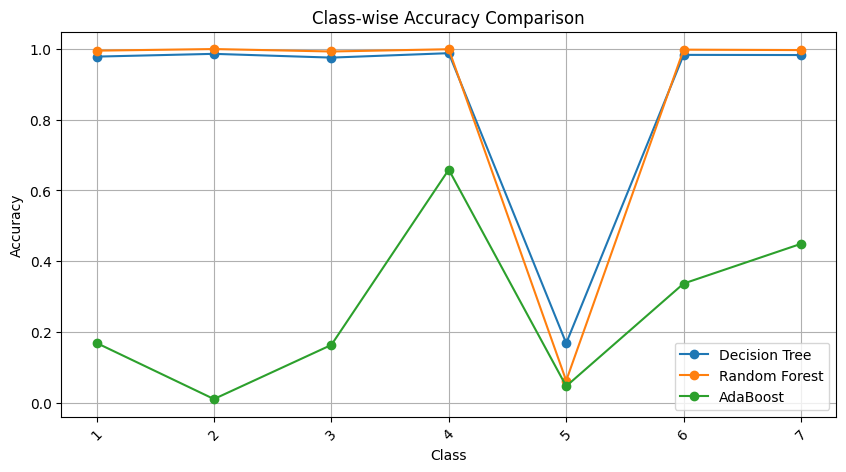

In [27]:
def plot_accuracy_class_wise(class_accuracies, model_names):
    plt.figure(figsize=(10, 5))
    
    for class_accuracy, model_name in zip(class_accuracies, model_names):
        classes = list(class_accuracy.keys())
        accuracies = list(class_accuracy.values())
        plt.plot(classes, accuracies, marker='o', label=model_name)

    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title('Class-wise Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming class_accuracy_decision_tree, class_accuracy_random_forest, class_accuracy_adaboost 
# are dictionaries containing class-wise accuracies for each model
class_accuracies = [class_accuracy_decision_tree, class_accuracy_random_forest, class_accuracy_adaboost]
model_names = ['Decision Tree', 'Random Forest', 'AdaBoost']

plot_accuracy_class_wise(class_accuracies, model_names)


### **F1 Score Of Each Model**

In [48]:
from sklearn.metrics import f1_score
# Compute F1 score for each model
f1_decision_tree = f1_score(y_test, y_pred_decision_tree,average="weighted")
f1_random_forest = f1_score(y_test, y_pred_random_forest,average="weighted")
f1_adaboost = f1_score(y_test, y_pred_random_forest,average="weighted")

print("F1 Score for Decision Tree model:", f1_decision_tree)
print("F1 Score for Random Forest model:", f1_random_forest)
print("F1 Score for AdaBoost model:", f1_adaboost)


F1 Score for Decision Tree model: 0.8005522640919922
F1 Score for Random Forest model: 0.773532674805818
F1 Score for AdaBoost model: 0.773532674805818


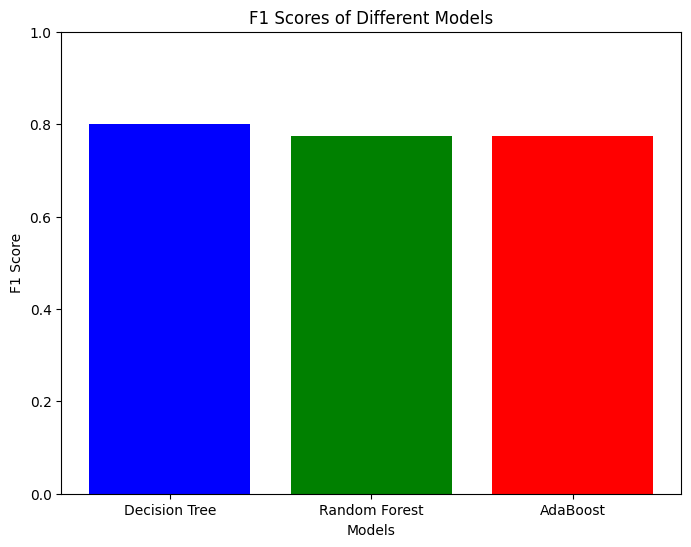

In [49]:
# F1 scores of the models
f1_scores = [f1_decision_tree, f1_random_forest, f1_adaboost]

# Names of the models
models = ['Decision Tree', 'Random Forest', 'AdaBoost']

# Plotting the F1 scores
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.ylim(0, 1)  # Setting y-axis limit
plt.show()


### **Confusion Matrix HeatMap**


A confusion matrix heatmap visualizes the performance of a classification model by displaying the counts or proportions of true positive, false positive, true negative, and false negative predictions for each class. It allows for easy identification of patterns and errors in the model's predictions. Each cell in the heatmap represents the number of instances where the actual class (rows) and predicted class (columns) intersect. The intensity of color in each cell indicates the frequency or proportion of instances.

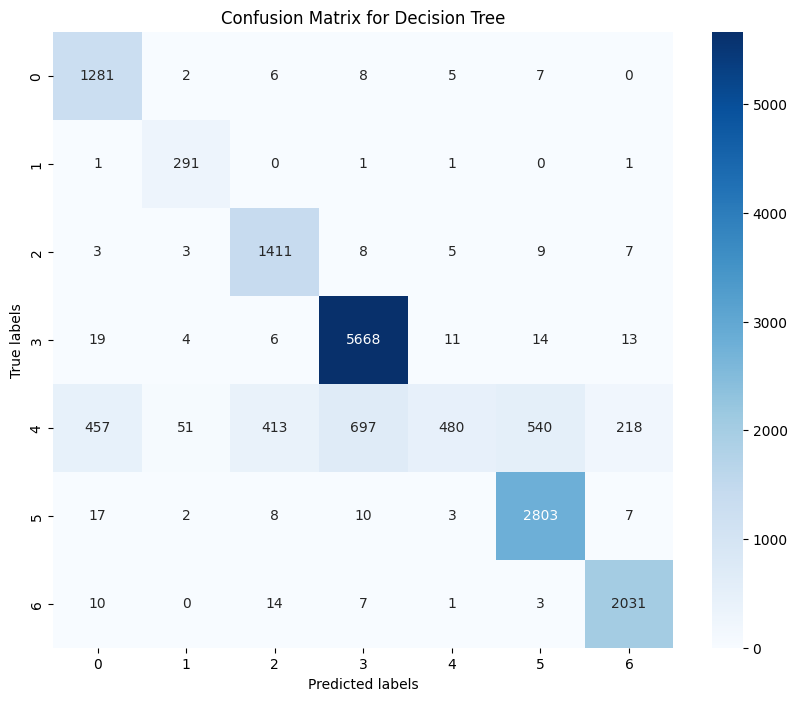

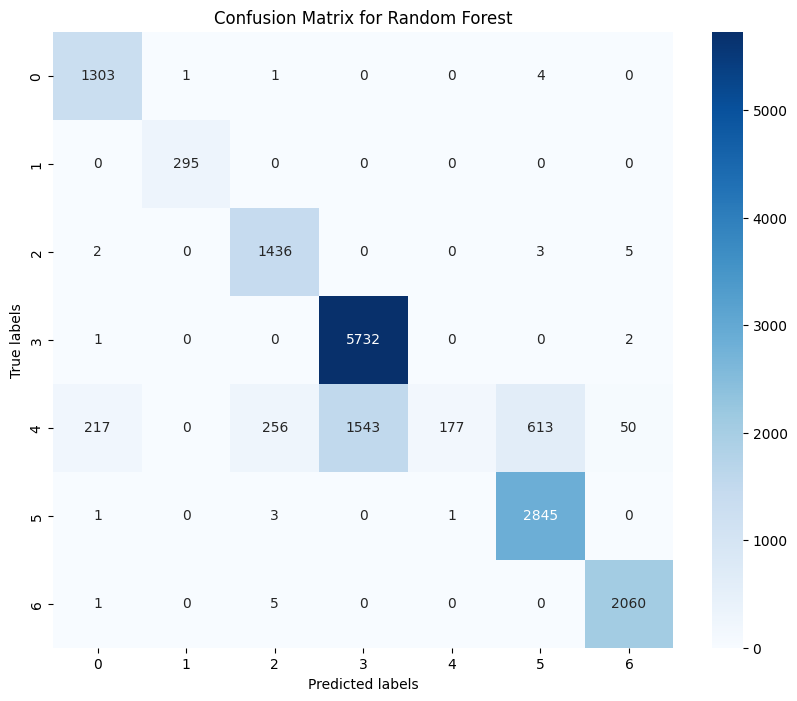

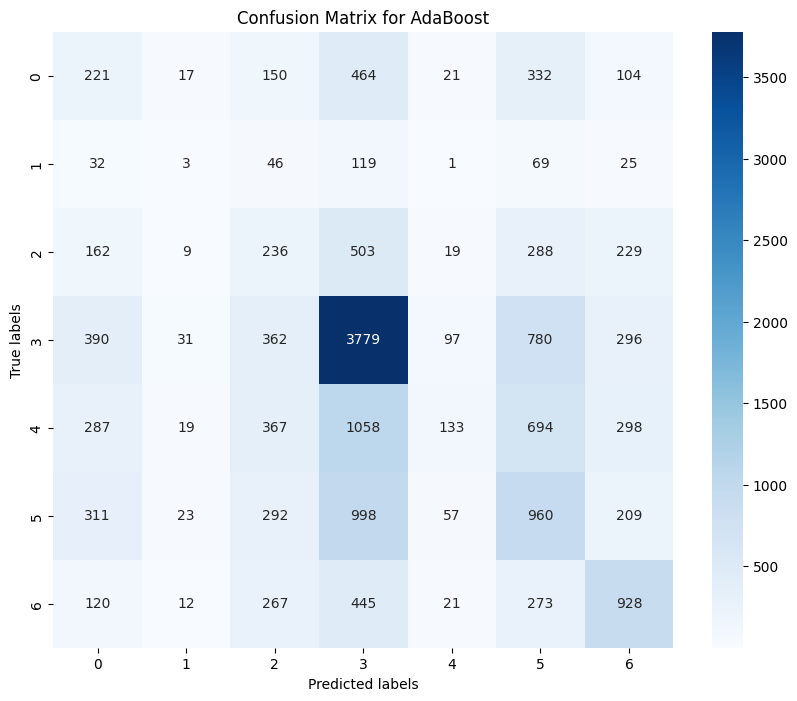

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_decision_tree, 'Decision Tree')
plot_confusion_matrix(y_test, y_pred_random_forest, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_adaboost, 'AdaBoost')


### **Plotting ROC CURVE**

The ROC curve shows how well a classification model can distinguish between classes. It plots the true positive rate against the false positive rate, with the area under the curve indicating the model's overall performance. A larger area means the model is better at distinguishing between classes.

C:\Users\abhaydagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


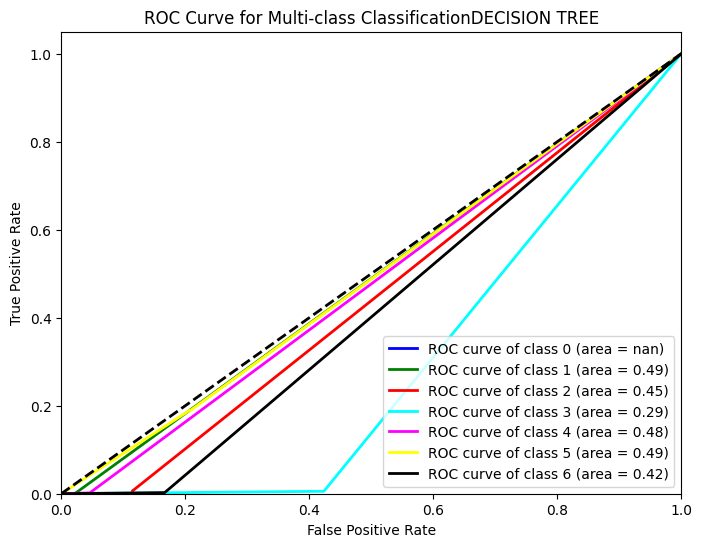

C:\Users\abhaydagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


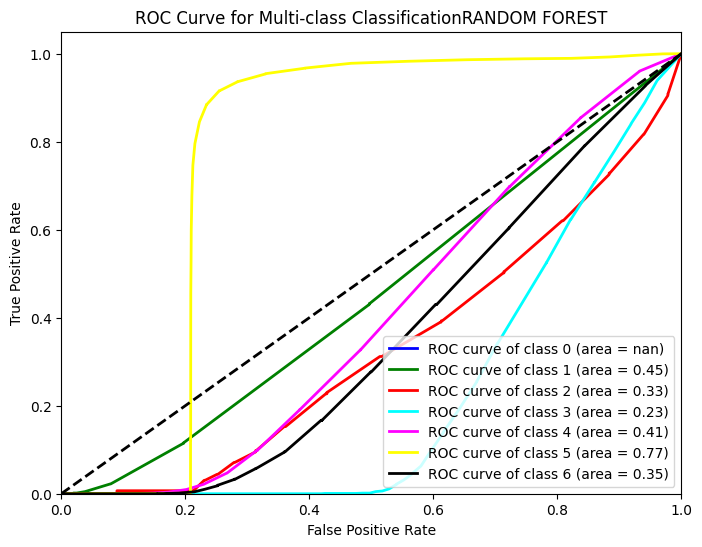

C:\Users\abhaydagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


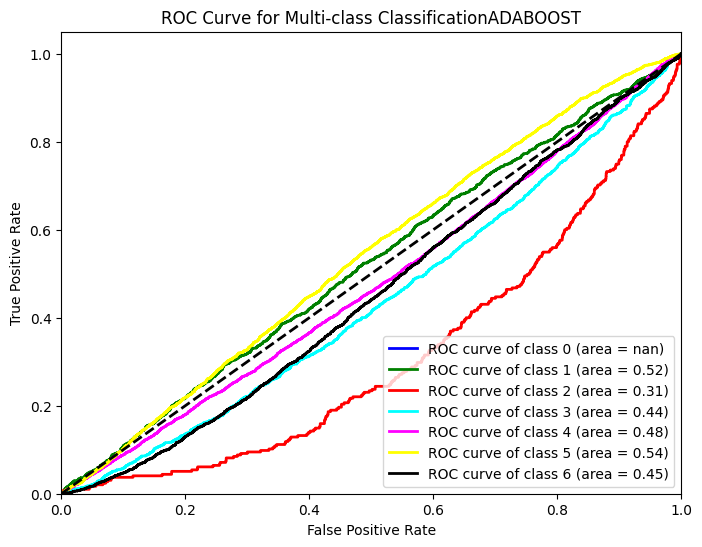

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve_multiclass(y_true, y_pred_prob, num_classes,model_name):
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-class Classification{model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Assuming y_pred_decision_tree_val, y_pred_random_forest_val, and y_pred_adaboost_val are probabilities for multi-class classification
y_pred_prob_decision_tree = decision_tree.predict_proba(X_test_pca)
y_pred_prob_random_forest = random_forest.predict_proba(X_test_pca)
y_pred_prob_adaboost = adaboost.predict_proba(X_test_pca)

plot_roc_curve_multiclass(y_test, y_pred_prob_decision_tree, 7,'DECISION TREE')
plot_roc_curve_multiclass(y_test, y_pred_prob_random_forest, 7,"RANDOM FOREST")
plot_roc_curve_multiclass(y_test, y_pred_prob_adaboost, 7,"ADABOOST")


### **Why AdaBoost Accu is less than Random Forest??**


Ans:For image datasets in facial expression detection, Random Forest is generally robust and suitable due to its ability to handle complex data effectively.


## **MODEL 4: CNN(CONVOLUTION NEURAL NETWORK)**

In [30]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [32]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 50262 images belonging to 7 classes.
Found 16557 images belonging to 7 classes.


In [33]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

C:\Users\abhaydagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
emotion_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(learning_rate=0.0001, decay=1e-6), 
                      metrics=['accuracy'])

C:\Users\abhaydagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [36]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=50262// 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=16557// 64)   #steps=no_of_images/64   Training On 100 epochs


Epoch 1/100


C:\Users\abhaydagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


785/785 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step - accuracy: 0.2532 - loss: 1.7876 - val_accuracy: 0.4251 - val_loss: 1.5783
Epoch 2/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.2812 - loss: 1.6747 - val_accuracy: 0.3778 - val_loss: 1.6692
Epoch 3/100
  1/785 ━━━━━━━━━━━━━━━━━━━━ 1:52 143ms/step - accuracy: 0.4062 - loss: 1.5678

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


785/785 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.4056 - loss: 1.5246 - val_accuracy: 0.4936 - val_loss: 1.3677
Epoch 4/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.3750 - loss: 1.4794 - val_accuracy: 0.5556 - val_loss: 1.3656
Epoch 5/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.4589 - loss: 1.4068 - val_accuracy: 0.5369 - val_loss: 1.2623
Epoch 6/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.5156 - loss: 1.3081 - val_accuracy: 0.5111 - val_loss: 1.2995
Epoch 7/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.4955 - loss: 1.3235 - val_accuracy: 0.5586 - val_loss: 1.2054
Epoch 8/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.4844 - loss: 1.3328 - val_accuracy: 0.5556 - val_loss: 1.2264
Epoch 9/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.5209 - loss: 1.2562 - val_accuracy: 0.5707 - val_loss: 1.1695
Epoch 10/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.5156 - loss: 1.3270 - val_acc

SAVE THE MODEL

In [39]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.weights.h5')
emotion_model.save('emotion_model.h5')
emotion_model.save('emotion_model.keras')

In [40]:
train_acc = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']
train_loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

# Print or visualize the accuracies and losses of each epoch
for epoch in range(1, len(train_acc) + 1):
    print(f"Epoch {epoch}:")
    print(f"Train Accuracy: {train_acc[epoch - 1]}, Train Loss: {train_loss[epoch - 1]}")
    print(f"Validation Accuracy: {val_acc[epoch - 1]}, Validation Loss: {val_loss[epoch - 1]}")


Epoch 1:
Train Accuracy: 0.30477309226989746, Train Loss: 1.7098541259765625
Validation Accuracy: 0.42508479952812195, Validation Loss: 1.5783487558364868
Epoch 2:
Train Accuracy: 0.28125, Train Loss: 1.6746914386749268
Validation Accuracy: 0.3777777850627899, Validation Loss: 1.6692111492156982
Epoch 3:
Train Accuracy: 0.41927966475486755, Train Loss: 1.4943370819091797
Validation Accuracy: 0.4935804307460785, Validation Loss: 1.3677129745483398
Epoch 4:
Train Accuracy: 0.375, Train Loss: 1.4794018268585205
Validation Accuracy: 0.5555555820465088, Validation Loss: 1.3656376600265503
Epoch 5:
Train Accuracy: 0.46603450179100037, Train Loss: 1.3865430355072021
Validation Accuracy: 0.5368822813034058, Validation Loss: 1.262283205986023
Epoch 6:
Train Accuracy: 0.515625, Train Loss: 1.308107852935791
Validation Accuracy: 0.5111111402511597, Validation Loss: 1.29954195022583
Epoch 7:
Train Accuracy: 0.5019323229789734, Train Loss: 1.3083254098892212
Validation Accuracy: 0.5586240291595459,

### **Storing In Model History Of Accuracy For Each EPOCH In A CSV FilE**

In [42]:
import pandas as pd

# Create a DataFrame to store accuracy and loss values
history_df = pd.DataFrame({
    'Epoch': range(1, len(train_acc) + 1),
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc,
    'Train Loss': train_loss,
    'Validation Loss': val_loss
})

# Save the DataFrame to a CSV file
history_df.to_csv('model_history.csv', index=False)

### **Plotting The Train Accuracy And Validation Accuracy**

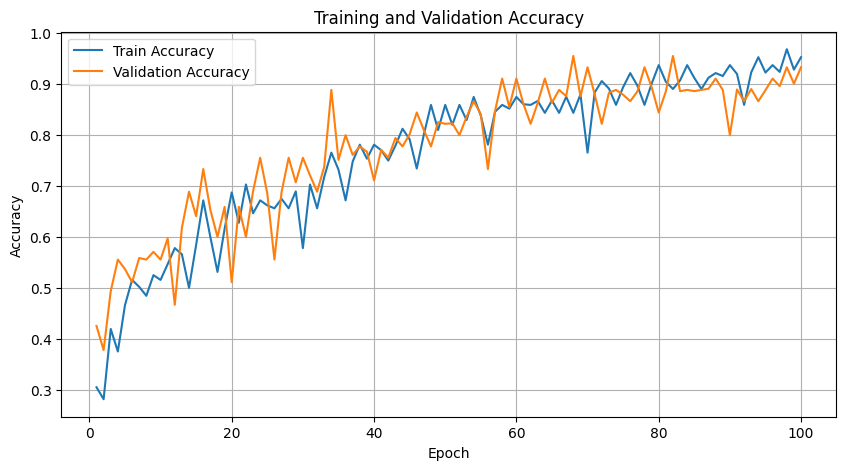

In [43]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### **Plotting The Train Loss And Validation Loss**

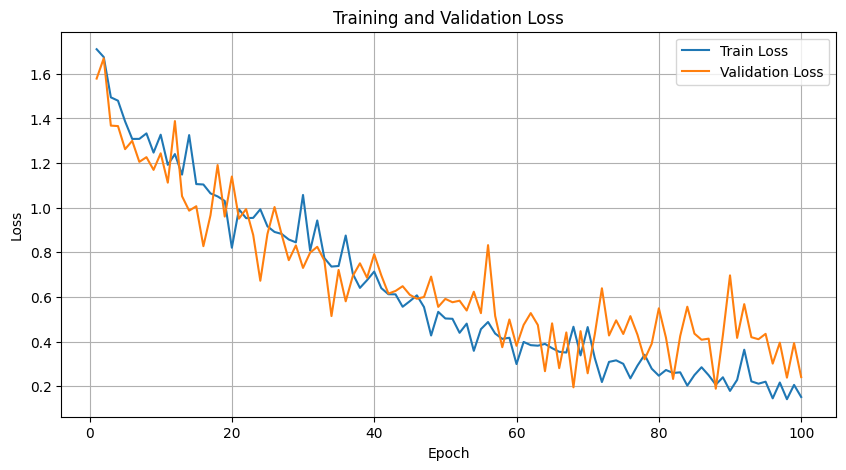

In [44]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### **END**